In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#K-means Clustering

In [2]:
import scipy.io

In [3]:
data1 = scipy.io.loadmat('ex7data2.mat')

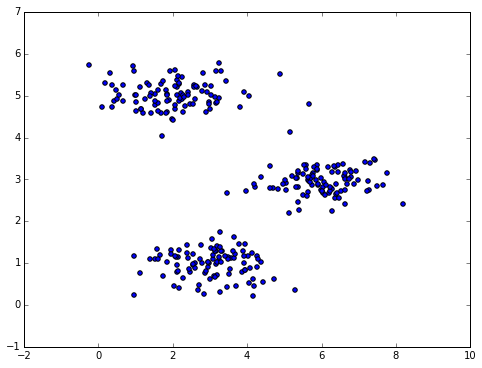

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['X'][:, 0], data1['X'][:, 1])
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
clf = KMeans(n_clusters=3)
clf.fit(data1['X'])

clf.cluster_centers_

array([[ 6.03366736,  3.00052511],
       [ 1.95399466,  5.02557006],
       [ 3.04367119,  1.01541041]])

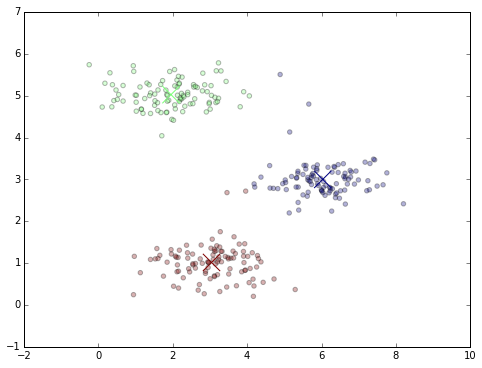

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['X'][:, 0], data1['X'][:, 1], c=clf.labels_, alpha=0.3);
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c=[1, 2, 3], marker='x', s=300)
plt.show()

#Image compression with K-means

In [8]:
import matplotlib.image as mpimg

In [9]:
bird = mpimg.imread('bird_small.png')

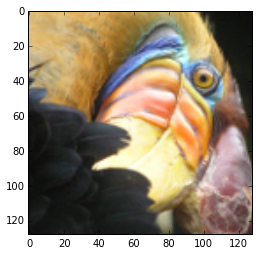

In [10]:
plt.imshow(bird)
plt.show()

In [11]:
w, h, d = bird.shape
data = bird.reshape(w * h, d)

In [12]:
clf2 = KMeans(n_clusters=16)
clf2.fit(data)

print clf2.cluster_centers_

[[ 0.0834935   0.09036529  0.08008345]
 [ 0.75141674  0.59885216  0.33388374]
 [ 0.97696686  0.9449037   0.81487768]
 [ 0.44822041  0.38334575  0.35380492]
 [ 0.82769043  0.74617228  0.73630365]
 [ 0.26959873  0.25164143  0.25290671]
 [ 0.39013966  0.46148964  0.65079703]
 [ 0.70019541  0.62881643  0.55957062]
 [ 0.86640783  0.71524649  0.45322981]
 [ 0.63555295  0.46031496  0.20289512]
 [ 0.15880958  0.16137279  0.15292723]
 [ 0.43953884  0.3145142   0.19034396]
 [ 0.91669935  0.57227943  0.253317  ]
 [ 0.96278682  0.85616545  0.62635042]
 [ 0.57213287  0.72428973  0.86969188]
 [ 0.58509721  0.49565052  0.44318836]]


In [13]:
compressed = clf2.cluster_centers_[clf2.labels_].reshape(w, h, d)

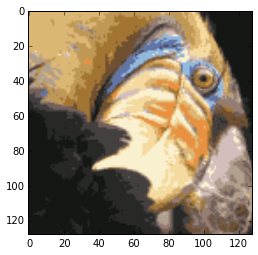

In [14]:
plt.imshow(compressed)
plt.show()

#Principal Component Analysis

In [15]:
data2 = scipy.io.loadmat('ex7data1.mat')

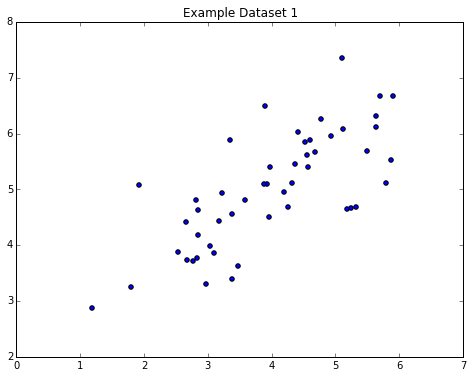

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Example Dataset 1')
plt.scatter(data2['X'][:, 0], data2['X'][:, 1])
plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
clf3 = Pipeline([('zscore', StandardScaler()),
                ('pca', PCA(n_components=1))])

In [19]:
X = clf3.fit_transform(data2['X'])
print clf3.named_steps['pca'].components_

[[ 0.70710678  0.70710678]]


In [20]:
X_inverse = clf3.named_steps['zscore'].inverse_transform(clf3.named_steps['pca'].components_ * X)

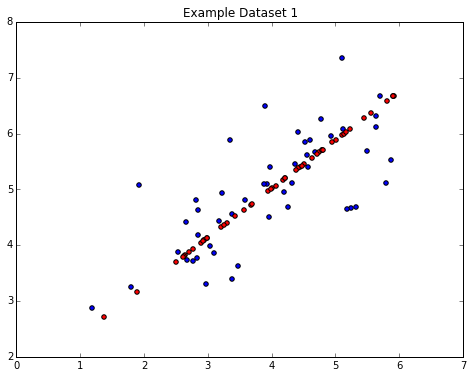

In [21]:
plt.figure(figsize=(8, 6))
plt.title('Example Dataset 1')
plt.scatter(data2['X'][:, 0], data2['X'][:, 1])
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], c='r', marker='o')
plt.show()